In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ft = 14
plt.rcParams.update({'font.size':ft})

In [ ]:
class Species(object):
  
  def __init__(self, name='no name',antoine = pd.read_csv('https://raw.githubusercontent.com/amandalemette/images/main/ENG1818/Antoine.csv')):
    self.name = name
    self.antoine = antoine
  
  def antoine():
    return pd.read_csv('Antoine.csv')

  def params(self):
    idx = self.antoine[self.antoine['compoundname']== self.name].index[0]
    A = self.antoine.loc[idx]['A']
    B = self.antoine.loc[idx]['B']
    C = self.antoine.loc[idx]['C']
    Tmin = self.antoine.loc[idx]['Tmin']
    Tmax = self.antoine.loc[idx]['Tmax']
    return [A,B,C,Tmin,Tmax]

  def Psat(self,params,T):
    return 10**(params[0]-params[1]/(T+params[2]))

  def Tsat(self,params,P):
    return params[1]/(params[0]-np.log10(P))-params[2]

In [ ]:
ac = Species('acetone')
et = Species('ethyl-alcohol')

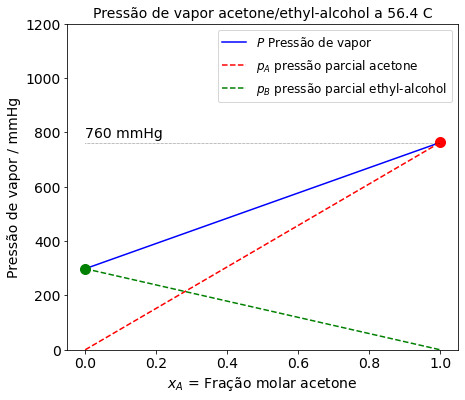

In [ ]:
#@title Lei de Raoult { run: "auto", vertical-output: true, form-width: "500px" }
#@markdown Defina aqui a temperatura do líquido.
T = 56.4 #@param {type:"slider", min:30, max:80, step:0.2}

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*ac.Psat(ac.params(),T)
pB = (1-xA)*et.Psat(et.params(),T)
Pv = pA + pB

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv,'b')
plt.plot(xA, pA,'r--')
plt.plot(xA, pB,'g--')

# mark pure component saturation pressures
plt.plot(0, et.Psat(et.params(),T), 'g.', ms=20)
plt.plot(1, ac.Psat(ac.params(),T), 'r.', ms=20)

# annotate the plot
plt.plot([0,1],[760,760],'k:', lw=0.5)
plt.text(0, 780, '760 mmHg')
plt.ylim(0, 1200)
plt.xlabel('$x_A$ = Fração molar ' + ac.name)
plt.ylabel('Pressão de vapor / mmHg')
#plt.title('Pressão de vapor '+ac.name+' / '+et.name+
#          ' a {:.1f} deg C'.format(T))
plt.title(f'Pressão de vapor {ac.name}/{et.name} a {np.round(T,2)} C',fontsize = 14)
plt.legend(['$P$ Pressão de vapor',
            '$p_A$ pressão parcial ' + ac.name,
            '$p_B$ pressão parcial ' + et.name],fontsize = 12)
plt.show()

# Exercícios

Resolva os itens a seguir.

1. Defina o que é ponto de ebulição. 

2. Ajuste a temperatura no gráfico acima para determinar aproximadamente o ponto de ebulição da acetona pura. 


3. Qual é o ponto de ebulição aproximado da mistura acetona/etanol quando a mistura contém 35 mol% de acetona? 


4. Qual é a composição da fase vapor correspondente? 

5. Você está em um armazém e se depara com um tanque lacrado rotulado com 60 % de acetona em etanol. Está 30 $^\circ$C no armazém. Qual é a pressão no tanque?

6. Suponha que você tenha uma mistura líquida de acetona/etanol com 50% molar de acetona. A uma pressão de 1 atm, a que temperatura a mistura entra em ebulição? Qual é a composição da fase de vapor?

7. Um processo químico produz uma corrente de vapor de acetona/etanol com 50 mol% de acetona. Em qual temperatura a corrente começa a condensar considerando a pressão de 1 atm?  

8. Construa

a) Um diagrama xy a P constante

b) Um diagrama xy a T constante

para dois componentes presentes no [site](http://www.ddbst.com/en/EED/VLE/VLEindex.php) e compare os seus diagramas com os dados reportados no site. 